In [1]:
import os
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
if os.path.exists("../custom_style.mplstyle"):
    plt.style.use(["ggplot", "../custom_style.mplstyle"])

In [3]:
figs_save_dir = os.path.join("../figs", "eval_metrics")
os.makedirs(figs_save_dir, exist_ok=True)

In [4]:
WORK_DIR = os.getenv("WORK", "")
DATA_DIR = os.path.join(WORK_DIR, "data")

In [5]:
run_metrics_dir_dict = {
    "Chronos Finetune": os.path.join(
        "../eval_results", "chronos", "387_metrics", "zeroshot"
    ),
    "Model 385": os.path.join("../eval_results", "patchtst", "385_metrics", "zeroshot"),
    "Model 388": os.path.join("../eval_results", "patchtst", "388_metrics", "zeroshot"),
}

In [6]:
run_metrics_dir_dict.keys()

dict_keys(['Chronos Finetune', 'Model 385', 'Model 388'])

In [ ]:
metrics_all_runs = defaultdict(dict)
for model_name, run_metrics_dir in run_metrics_dir_dict.items():
    print(model_name)
    for file in sorted(
        os.listdir(run_metrics_dir),
        key=lambda x: int(x.split("_pred")[1].split(".csv")[0]),
    ):
        if file.endswith(".csv"):
            prediction_length = int(file.split("_pred")[1].split(".csv")[0])
            print(prediction_length)
            with open(os.path.join(run_metrics_dir, file), "r") as f:
                metrics = pd.read_csv(f).to_dict()
                metrics_all_runs[model_name][prediction_length] = metrics

Chronos Finetune
64
128
192
256
320
384
448
512
Model 385
64
128
192
256
320
384
448
512
Model 388
64
128
192
256
320
384
448
512


In [8]:
metrics_all_runs.keys()

dict_keys(['Chronos Finetune', 'Model 385', 'Model 388'])

In [9]:
metrics_all_runs["Model 385"][64].keys()

dict_keys(['system', 'mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])

In [10]:
unrolled_metrics = defaultdict(dict)
for model_name, all_metrics_of_model in metrics_all_runs.items():
    print(model_name)
    for run_name, metrics in all_metrics_of_model.items():
        print(run_name)
        systems = metrics.pop("system")
        metrics_unrolled = {k: list(v.values()) for k, v in metrics.items()}
        print(metrics_unrolled.keys())
        unrolled_metrics[model_name][run_name] = metrics_unrolled

Chronos Finetune
64
dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])
128
dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])
192
dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])
256
dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])
320
dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])
384
dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])
448
dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])
512
dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])
Model 385
64
dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])
128
dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])
192
dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])
256
dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pe

In [11]:
unrolled_metrics.keys()

dict_keys(['Chronos Finetune', 'Model 385', 'Model 388'])

In [12]:
unrolled_metrics["Model 385"][64].keys()

dict_keys(['mse', 'mae', 'r2_score', 'smape', 'mape', 'spearman', 'pearson'])

In [13]:
len(unrolled_metrics["Model 385"][64]["smape"])

325

MSE median: 0.39590064
MAE median: 0.3579031
R2 score median: 0.5374461710453033
SMAPE median: 58.65633487701416
MAPE median: 402.9933452606201
Spearman median: 0.2943421957985393
Pearson median: 0.8249017939806281


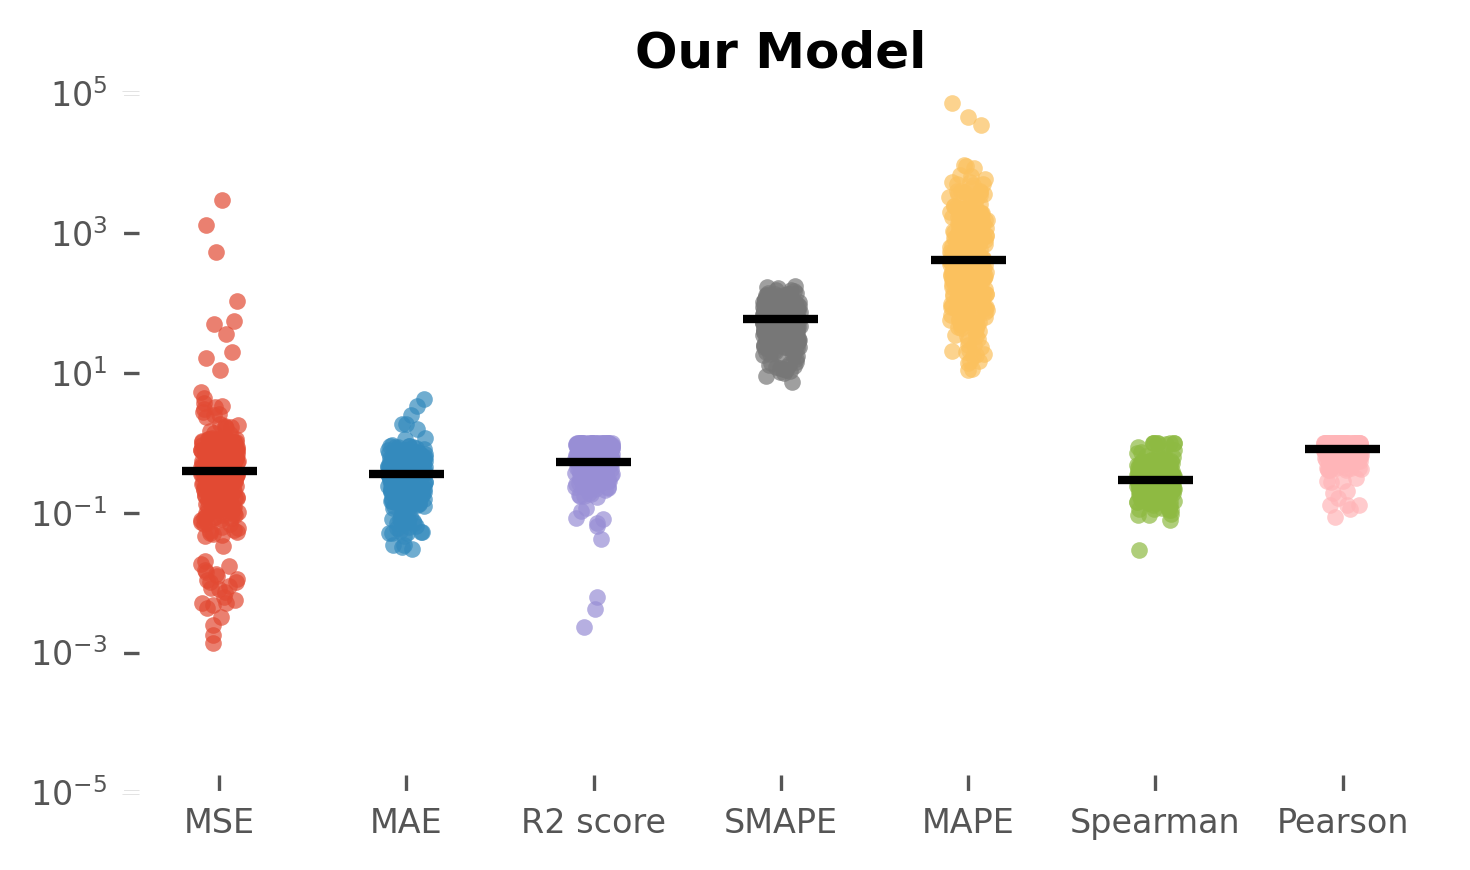

In [14]:
plt.figure(figsize=(5, 3))
for i, (name, values) in enumerate(unrolled_metrics["Model 385"][128].items()):
    name = name.replace("_", " ")
    if name in ["mse", "mae", "rmse", "mape", "smape"]:
        name = name.upper()
    else:
        name = name.capitalize()
    sns.stripplot(x=[name] * len(values), y=values, label=None, alpha=0.7, size=4)
    median_value = np.median(values)
    print(f"{name} median: {median_value}")
    # print(np.isnan(median_value))
    plt.hlines(
        y=median_value, xmin=i - 0.2, xmax=i + 0.2, color="black", linewidth=2, zorder=3
    )  # Added horizontal line for median
plt.yscale("log")
plt.ylim(1e-5, 1e5)
# plt.legend(title="Metrics", frameon=True, fontsize=6)
plt.title("Our Model", fontweight="bold")
plt.savefig(os.path.join(figs_save_dir, f"{run_name}_metrics_strip.pdf"))

MSE median: 1.4115175
MAE median: 0.7923661
R2 score median: -0.0355463027954101
SMAPE median: 90.20949006080627
MAPE median: 332.5004816055298
Spearman median: 0.6980371822848045
Pearson median: 0.5001860768150787


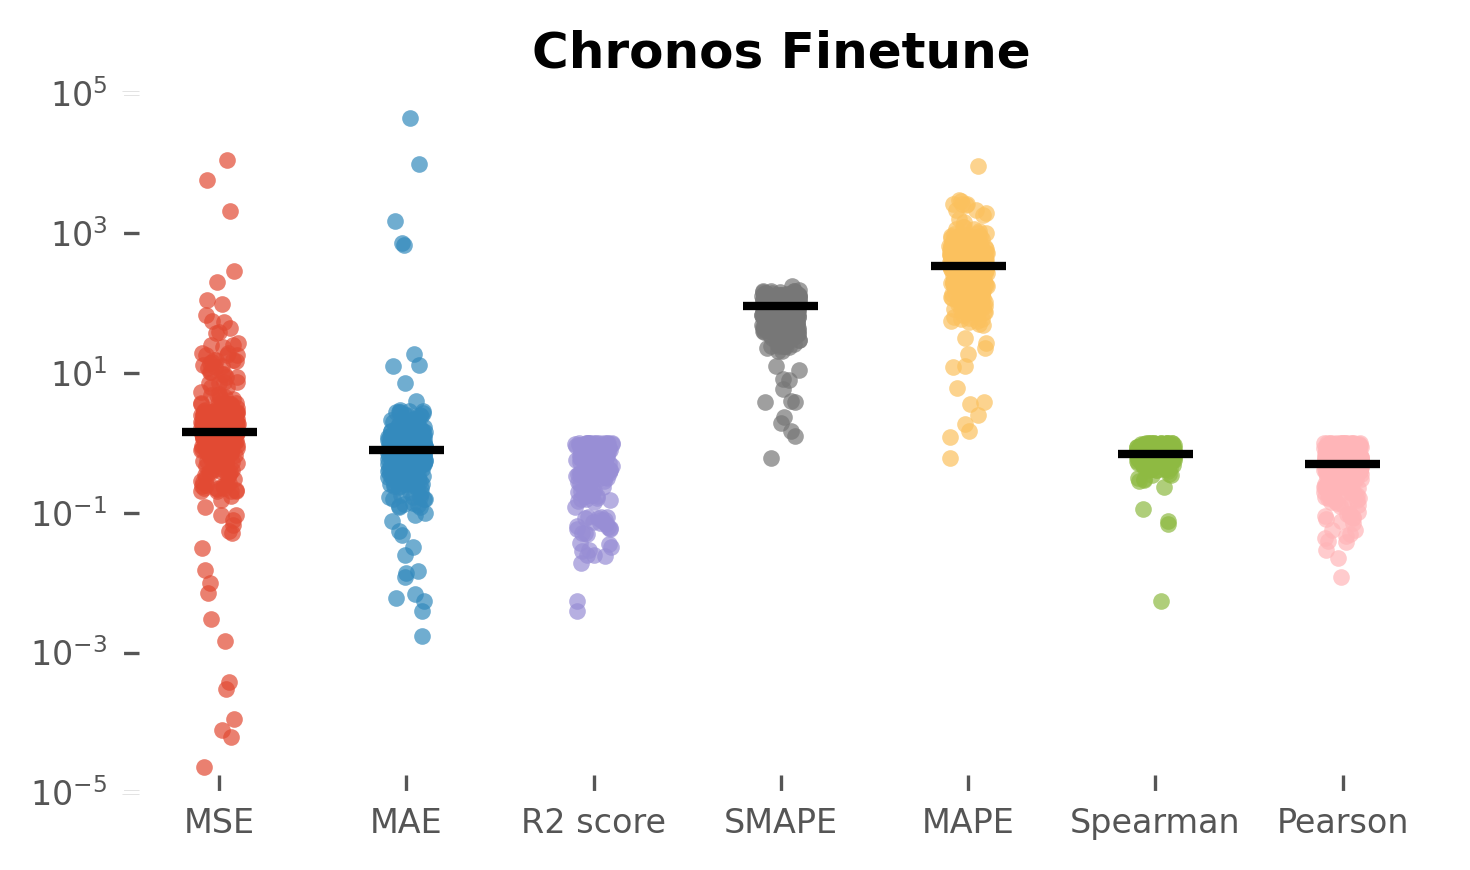

In [15]:
plt.figure(figsize=(5, 3))
for i, (name, values) in enumerate(unrolled_metrics["Chronos Finetune"][128].items()):
    name = name.replace("_", " ")
    if name in ["mse", "mae", "rmse", "mape", "smape"]:
        name = name.upper()
    else:
        name = name.capitalize()
    sns.stripplot(x=[name] * len(values), y=values, label=None, alpha=0.7, size=4)
    median_value = np.median(values)
    print(f"{name} median: {median_value}")
    # print(np.isnan(median_value))
    plt.hlines(
        y=median_value, xmin=i - 0.2, xmax=i + 0.2, color="black", linewidth=2, zorder=3
    )  # Added horizontal line for median
plt.yscale("log")
plt.ylim(1e-5, 1e5)
plt.title("Chronos Finetune", fontweight="bold")

# plt.legend(title="Metrics", frameon=True, fontsize=6)
plt.savefig(os.path.join(figs_save_dir, f"{run_name}_metrics_strip.pdf"))

In [16]:
def get_summary_metrics_dict(unrolled_metrics, metric_name):
    summary_metrics_dict = defaultdict(dict)
    for model_name, metrics_dict in unrolled_metrics.items():
        print(model_name)
        prediction_lengths = list(metrics_dict.keys())
        summary_metrics_dict[model_name]["prediction_lengths"] = prediction_lengths
        means = []
        medians = []
        stds = []
        for prediction_length in prediction_lengths:
            metric_val = metrics_dict[prediction_length][metric_name]
            means.append(np.mean(metric_val))
            medians.append(np.median(metric_val))
            stds.append(np.std(metric_val))
        summary_metrics_dict[model_name]["means"] = means
        summary_metrics_dict[model_name]["medians"] = medians
        summary_metrics_dict[model_name]["stds"] = stds
    return summary_metrics_dict

In [17]:
smape_metrics_dict = get_summary_metrics_dict(unrolled_metrics, "smape")

Chronos Finetune
Model 385
Model 388


In [18]:
smape_metrics_dict["Model 385"].keys()

dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])

In [19]:
def plot_metrics_by_prediction_length(
    metrics_dict, metric_name, show_std_envelope=False
):
    plt.figure(figsize=(5, 4))
    for model_name, metrics in metrics_dict.items():
        plt.plot(
            metrics["prediction_lengths"],
            metrics["medians"],
            marker="o",
            label=model_name,
        )
        std_envelope = np.array(metrics["stds"])
        if show_std_envelope:
            plt.fill_between(
                metrics["prediction_lengths"],
                metrics["means"] - std_envelope,
                metrics["means"] + std_envelope,
                alpha=0.2,
            )
    plt.legend(loc="lower right")
    plt.xlabel("Prediction Length")
    plt.title(metric_name, fontweight="bold")

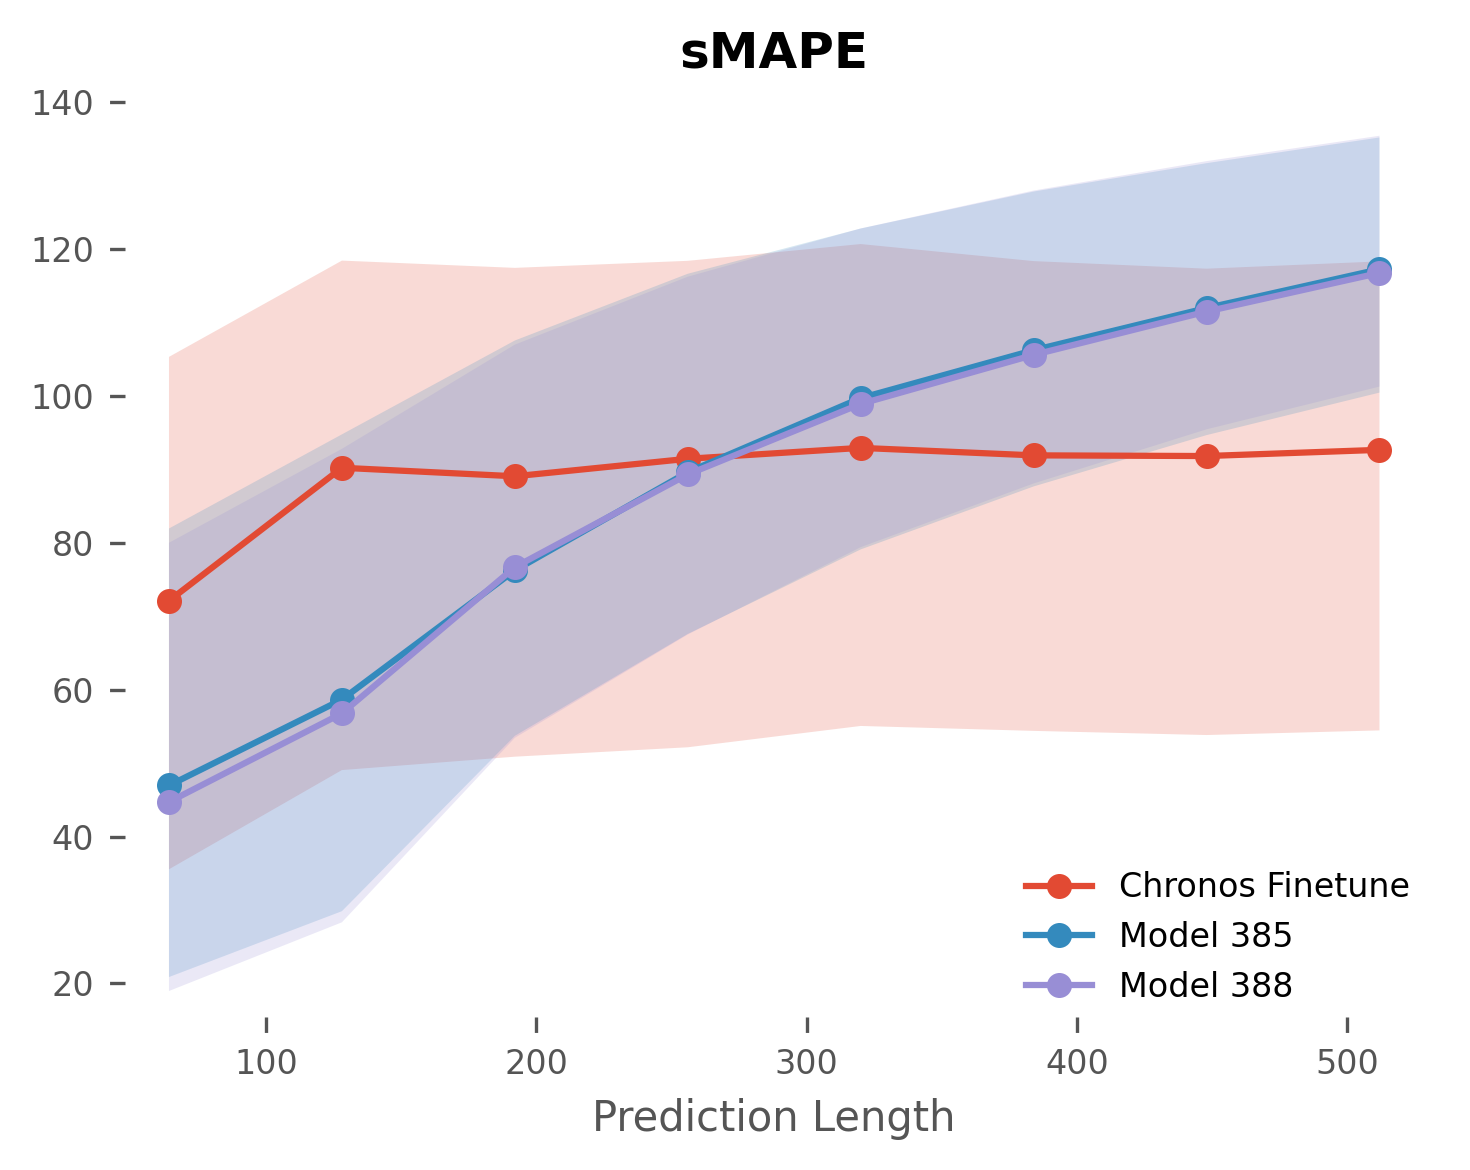

In [20]:
plot_metrics_by_prediction_length(smape_metrics_dict, "sMAPE", show_std_envelope=True)

In [ ]:
all_metrics_dict = {
    metrics_name: get_summary_metrics_dict(unrolled_metrics, metrics_name)
    for metrics_name in [
        "mse",
        "mae",
        "mape",
        "smape",
        "r2_score",
        "pearson",
        "spearman",
    ]
}

Chronos Finetune
Model 385
Model 388
Chronos Finetune
Model 385
Model 388
Chronos Finetune
Model 385
Model 388
Chronos Finetune
Model 385
Model 388
Chronos Finetune
Model 385
Model 388
Chronos Finetune
Model 385
Model 388
Chronos Finetune
Model 385
Model 388


/stor/work/AMDG_Gilpin_Summer2024/miniconda3/envs/dystformer/lib/python3.10/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


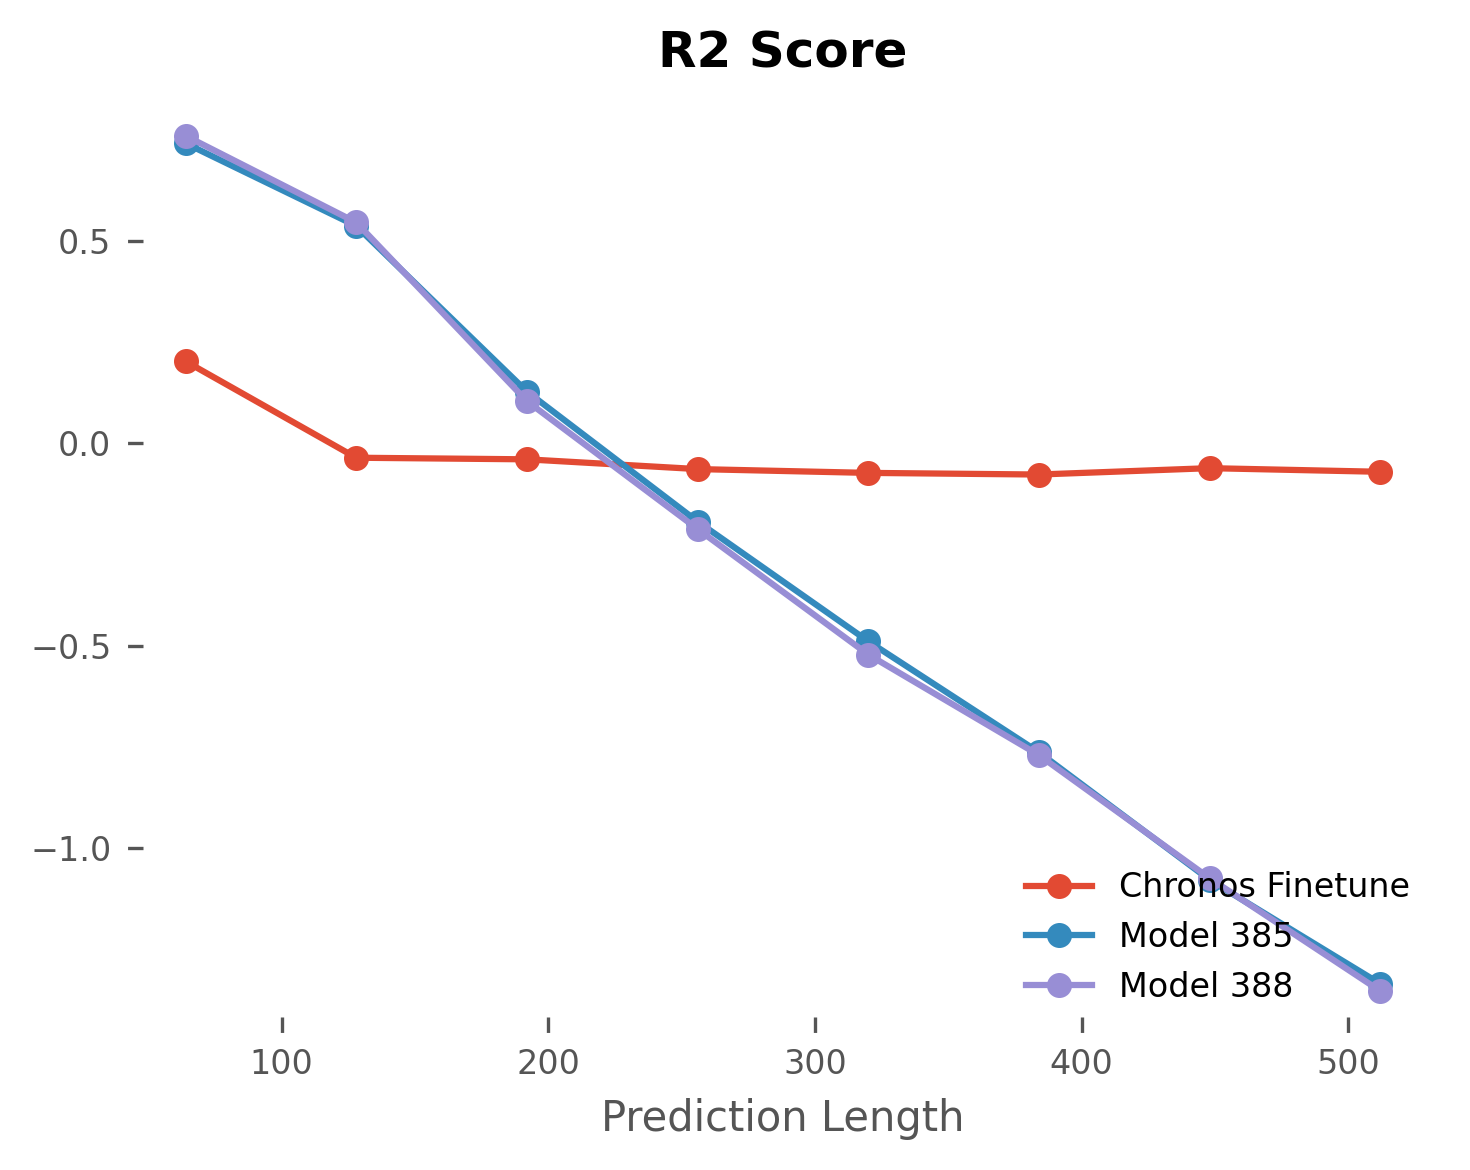

In [22]:
plot_metrics_by_prediction_length(
    all_metrics_dict["r2_score"], "R2 Score", show_std_envelope=False
)

In [23]:
all_metrics_dict.keys()

dict_keys(['mse', 'mae', 'mape', 'smape', 'r2_score', 'pearson', 'spearman'])

In [24]:
all_metrics_dict["mse"].keys()

dict_keys(['Chronos Finetune', 'Model 385', 'Model 388'])

In [25]:
def plot_all_metrics_by_prediction_length(
    all_metrics_dict: dict[str, dict[str, dict[str, list[float]]]],
    metric_names: list[str],
    metrics_to_show_std_envelope: list[str],
    n_rows: int = 2,
    n_cols: int = 3,
):
    num_metrics = len(metric_names)
    fig, axes = plt.subplots(
        nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows)
    )
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, (ax, metric_name) in enumerate(zip(axes, metric_names)):
        metrics_dict = all_metrics_dict[metric_name]
        for model_name, metrics in metrics_dict.items():
            print(model_name)
            print(metrics.keys())
            ax.plot(
                metrics["prediction_lengths"],
                metrics["medians"],
                marker="o",
                label=model_name,
            )
            std_envelope = np.array(metrics["stds"])
            if metric_name in metrics_to_show_std_envelope:
                ax.fill_between(
                    metrics["prediction_lengths"],
                    metrics["means"] - std_envelope,
                    metrics["means"] + std_envelope,
                    alpha=0.2,
                )
        if i == 0:
            ax.legend(loc="lower right", frameon=True)
        ax.set_xlabel("Prediction Length")
        ax.set_xticks(metrics["prediction_lengths"])
        name = metric_name.replace("_", " ")
        if name in ["mse", "mae", "rmse", "mape", "smape"]:
            name = name.upper()
        else:
            name = name.capitalize()
        ax.set_title(name, fontweight="bold")

    # Hide any unused subplots
    for ax in axes[num_metrics:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

Chronos Finetune
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Model 385
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Model 388
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Chronos Finetune
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Model 385
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Model 388
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Chronos Finetune
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Model 385
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Model 388
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Chronos Finetune
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Model 385
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Model 388
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Chronos Finetune
dict_keys(['prediction_lengths', 'means', 'medians', 'stds'])
Model 385
dict_keys(['predict

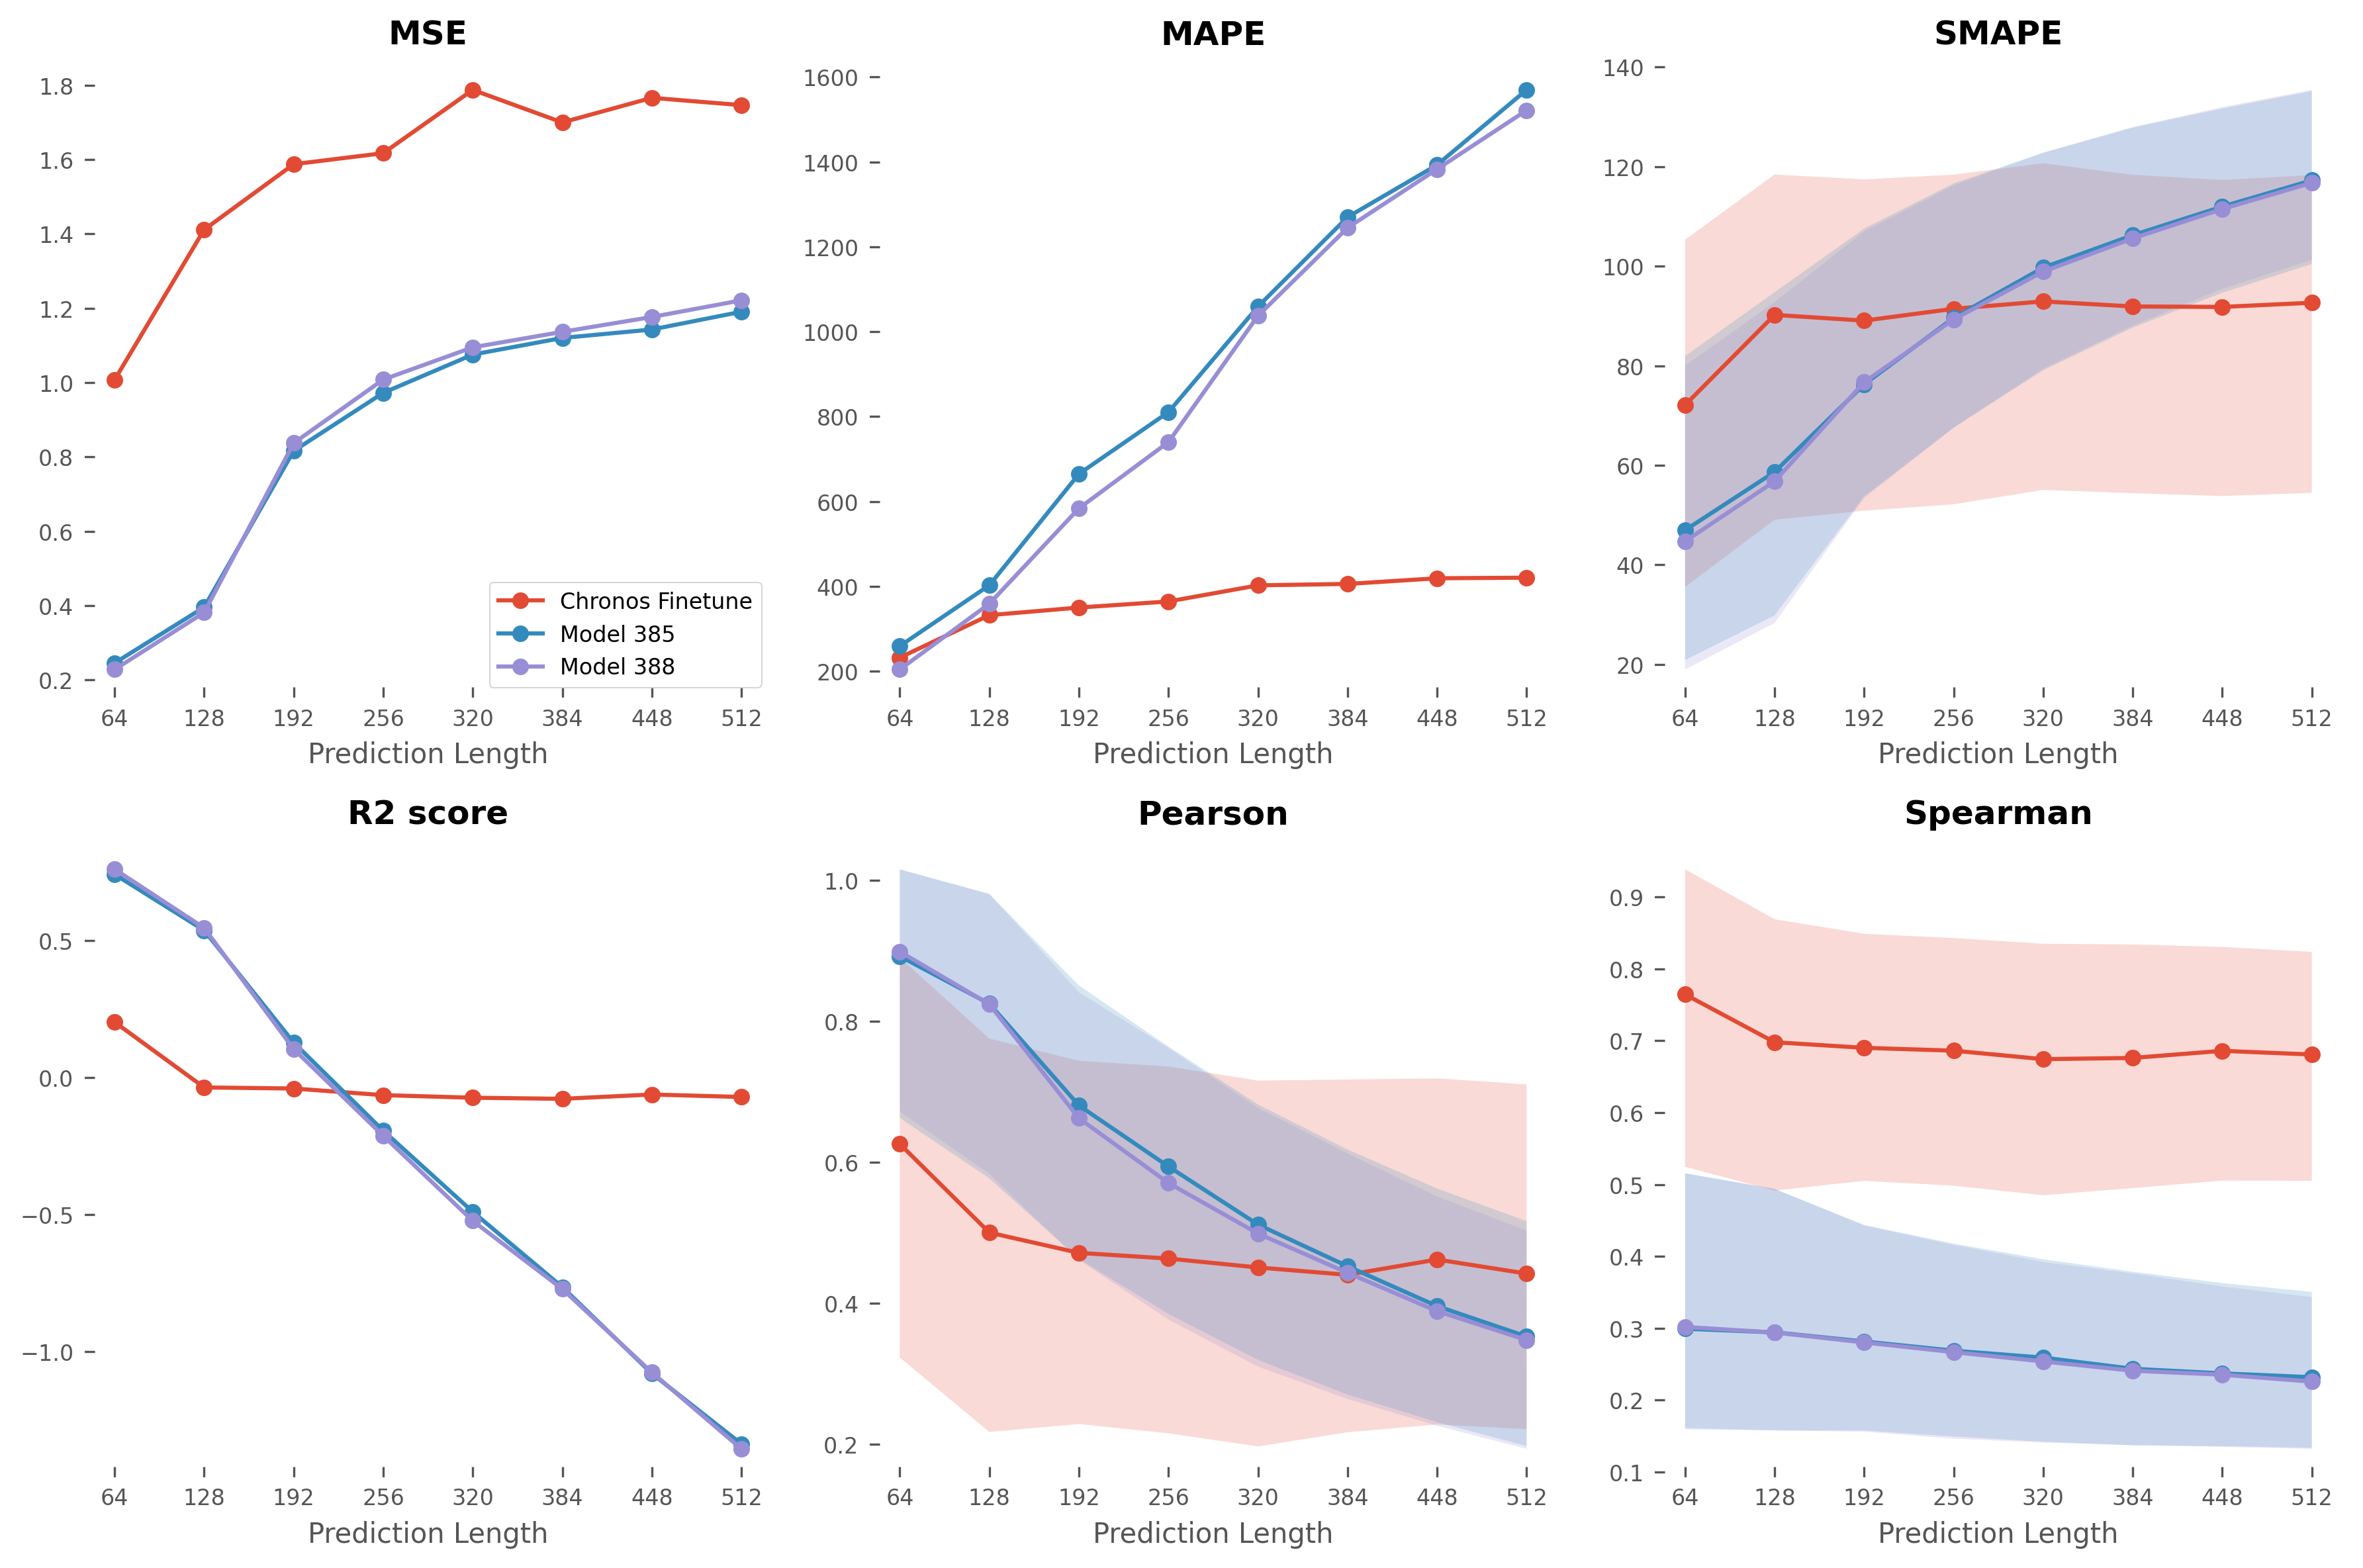

In [26]:
plot_all_metrics_by_prediction_length(
    all_metrics_dict,
    ["mse", "mape", "smape", "r2_score", "pearson", "spearman"],
    metrics_to_show_std_envelope=["smape", "pearson", "spearman"],
)